In [65]:
import math
import matplotlib
from matplotlib.ticker import FixedLocator, LogFormatter
from core.util import matplotlib_setting, read_row, std_tri, std_rect, read_column, lin_regression, format_with_error, intersect_parabula
from core.fit import fit_poly, fit_exp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

matplotlib_setting()
file_path = "./../data/brue.xlsx"  # Replace with your file path
df = pd.read_excel(file_path, 'part_3', header=None)
voltage10 = read_column(df, column=0, start_row=0, end_row=7)
voltage30 = read_column(df, column=2, start_row=0, end_row=7)
voltage200 = read_column(df, column=4, start_row=0, end_row=7)

rev_err = std_tri(0.01)

rev10 = read_column(df, column=1, start_row=0, end_row=7)
rev10_err = 10/(10-rev10)**2 * rev_err
print(rev10_err)
res10 = (rev10 / (10-rev10))*10
res10_err = np.sqrt(rev10_err**2 + ((res10/10)*10*0.01)**2)
rev30 = read_column(df, column=3, start_row=0, end_row=7)
rev30_err = 10/(10-rev30)**2 * rev_err
rev100_err = 10/(10-1.92)**2 * rev_err
res30 = (rev30 / (10-rev30))*30
res30_err = np.sqrt(rev30_err**2 + ((res30/30)*30*0.01)**2)
rev200 = read_column(df, column=5, start_row=0, end_row=7)
rev200_err = 10/(10-rev200)**2 * rev_err
res200 = (rev200 / (10-rev200))*200
res200_err = np.sqrt(rev200_err**2 + ((res200/200)*200*0.01)**2)
res100 = np.array([(1.92 / (10-1.92))*100])
res100_err = np.sqrt(rev100_err**2 + ((1.92/100)*100*0.01)**2)
df.head()


[0.00689982 0.01189465 0.01627265 0.02041241 0.02411675 0.02825248]


,0,1,2,3,4,5,6,7
0,1.01,8.28,1.01,5.85,1.01,0.78,NaN,NaN
1,2,8.69,2.01,6.7,2,1.16,NaN,NaN
2,3,8.88,2.99,7.12,3,1.56,NaN,NaN
3,4,9,4.01,7.39,4,1.86,NaN,NaN
4,4.98,9.08,5.00,7.57,5.05,2.12,NaN,NaN


In [66]:
#0.5% +8
voltage10_err = std_rect(voltage10*0.005 + 0.08)
voltage30_err = std_rect(voltage30*0.005 + 0.08)
voltage100_err = std_rect(1.01*0.005 + 0.08)
voltage200_err = std_rect(voltage200*0.005 + 0.08)


i10 = (voltage10/(10+res10))
i10_err = np.sqrt(
    ((1/(10+res10))*voltage10_err)**2 + \
    ((-voltage10/(10+res10)**2)*10*0.01)**2 + \
    ((-voltage10/(10+res10)**2)*res10_err)**2
)

i30 = (voltage30/(30+res30))

i30_err = np.sqrt(
    ((1/(30+res30))*voltage30_err)**2 + \
    ((-voltage30/(30+res30)**2)*30*0.01)**2 + \
    ((-voltage30/(30+res30)**2)*res30_err)**2
)

i100_err = np.sqrt(
    ((1/(100+res100))*voltage100_err)**2 + \
    ((-1.01/(100+res100)**2)*100*0.01)**2 + \
    ((-1.01/(100+res100)**2)*res100_err)**2
)

i200 = (voltage200/(200+res200))

i200_err = np.sqrt(
    ((1/(200+res200))*voltage200_err)**2 + \
    ((-voltage200/(200+res200)**2)*200*0.01)**2 + \
    ((-voltage200/(200+res200)**2)*res200_err)**2
)

i100 = (1.01/(100+res100))

p10 = voltage10*i10*(res10/(10+res10))*1000
p10_err = np.sqrt(
    ((i10*res10/(res10+10))*voltage10_err)**2 + \
    ((voltage10*res10/(res10+10))*i10_err)**2 + \
    ((voltage10*res10/(10+res10)**2)*10*0.01)**2 + \
    ((voltage10*res10/(10+res10)**2)*res10_err)**2
)*1000

p30 = voltage30*i30*(res30/(30+res30))*1000
p30_err = np.sqrt(
    ((i30*res30/(res30+30))*voltage30_err)**2 + \
    ((voltage30*res30/(res30+30))*i30_err)**2 + \
    ((voltage30*res30/(30+res30)**2)*30*0.01)**2 + \
    ((voltage30*res30/(30+res30)**2)*res30_err)**2
)*1000

p100 = (1.01*i100*(res100/(100+res100)))*1000

p100_err = np.sqrt(
    ((i100*res100/(res100+100))*voltage100_err)**2 + \
    ((1.01*res100/(res100+100))*i100_err)**2 + \
    ((1.01*res100/(100+res100)**2)*100*0.01)**2 + \
    ((1.01*res100/(100+res100)**2)*res100_err)**2
)*1000

p200 = voltage200*i200*(res200/(200+res200))*1000
p200_err = np.sqrt(
    ((i200*res200/(res200+200))*voltage200_err)**2 + \
    ((voltage200*res200/(res200+200))*i200_err)**2 + \
    ((voltage200*res200/(200+res200)**2)*200*0.01)**2 + \
    ((voltage200*res200/(200+res200)**2)*res200_err)**2
)*1000

print(rev10_err)
print(rev30_err)
print(rev100_err)
print(rev200_err)
print("---")
print(res10[0], res10_err[0])
print(res30[0], res30_err[0])
print(res100, res100_err)
print(res200[0],res200_err[0])
print("---")
print(i10[0], i10_err[0])
print(i30[0], i30_err[0])
print(i100, i100_err)
print(i200[0], i200_err[0])
print("---")
print(p10[0], p10_err[0])
print(p30[0], p30_err[0])
print(p100, p100_err)
print(p200[0], p200_err[0])


resArr = np.concat((res10, res30, res100, res200)).astype(np.float64)
iArr = np.concat((i10, i30, i100, i200)).astype(np.float64)
pArr = np.concat((p10, p30,p100, p200)).astype(np.float64)


[0.00689982 0.01189465 0.01627265 0.02041241 0.02411675 0.02825248]
[0.00118522 0.00187442 0.00246099 0.00299649 0.00345686 0.00392667]
0.0003126595205616048
[0.00024012 0.00026121 0.00028656 0.00030807 0.00032873 0.00034608]
---
48.13953488372091 0.4814447936551558
42.28915662650601 0.4228932271383425
[23.76237624] 0.019202545559789664
16.919739696312362 0.16919756735197783
---
0.017372000000000005 0.00044712078366356217
0.013971666666666669 0.0003541093386351161
[0.0081608] [0.00020905]
0.0046561 0.00012110616300633808
---
14.527856160000002 7.091591833215683
8.25515925 4.247797028482114
[1.58254234] [1.56815865]
0.3668075579999999 0.7290631607159119


[ 48.13953488  66.33587786  79.28571429  90.          98.69565217
 107.64705882  42.28915663  60.90909091  74.16666667  84.94252874
  93.45679012 101.57894737  23.76237624  16.9197397   26.24434389
  36.96682464  45.7002457   53.8071066   60.41666667]
[0.017372   0.0262     0.0336     0.04       0.045816   0.050915
 0.01397167 0.02211    0.028704   0.034887   0.0405     0.0456
 0.0081608  0.0046561  0.00884    0.01266    0.01628    0.019897
 0.0231936 ]
[ 48.13953488  66.33587786  79.28571429  90.          98.69565217
 107.64705882  42.28915663  60.90909091  74.16666667  84.94252874
  93.45679012 101.57894737  23.76237624  16.9197397   26.24434389
  36.96682464  45.7002457   53.8071066   60.41666667]
[ 14.52785616  45.5356      89.5104     144.         207.17262144
 279.05747775   8.25515925  29.775537    61.10737152 103.38378693
 153.2925     211.2192       1.58254234   0.36680756   2.05088
   5.92488     12.11232     21.3017282   32.50072781]


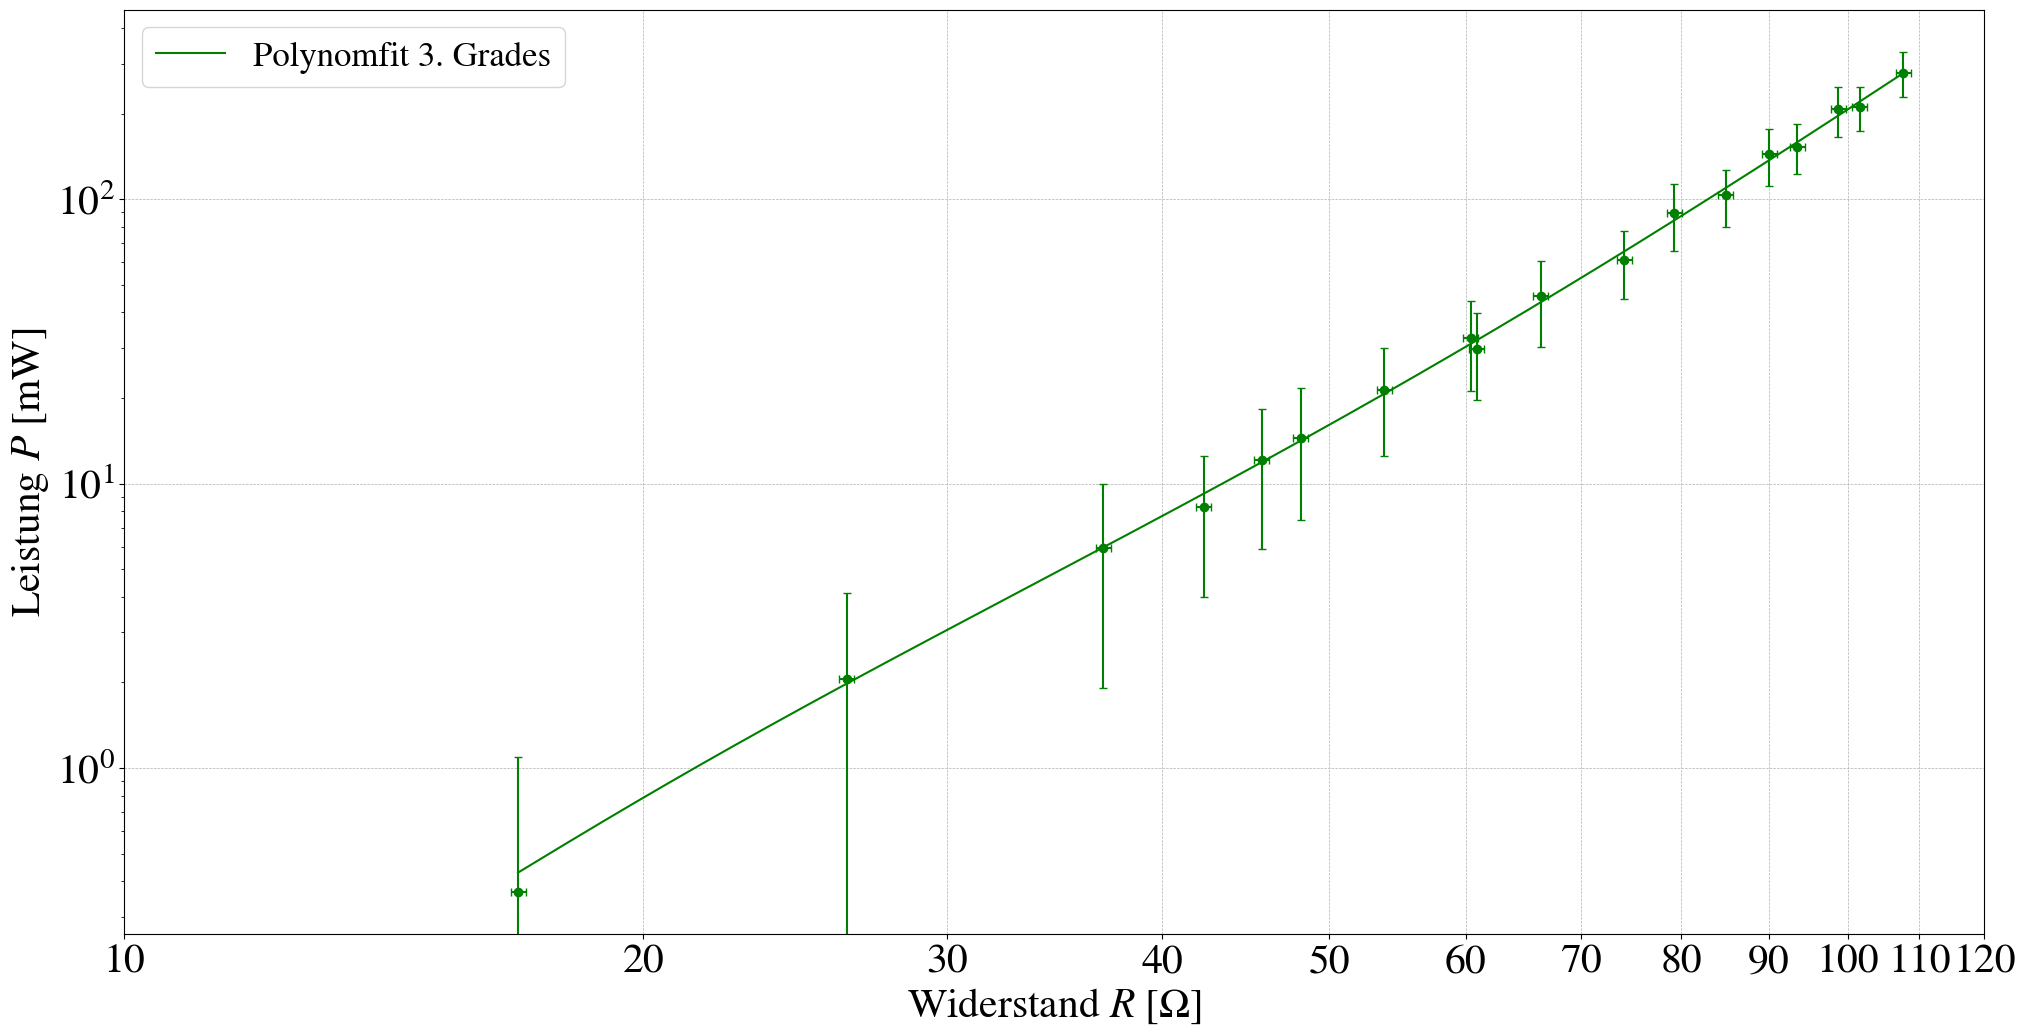

In [67]:


i_fit = fit_poly(resArr, iArr, 3)
p_fit = fit_poly(resArr, pArr, 4)

#paramsP, covP = np.polyfit(p10, res10, 1, cov=True)

#print(np.sqrt(cov[0,0] + total_err**2))
#print(np.sqrt(cov[0,0]))
#print(slope, np.sqrt(cov[0,0]))
#print(vars)
#r_fit = np.linspace(res10.min(), res10.max(), 1000)
#p10_fit = sinus(t_fit, *params1)

#plt.plot(res10, slope10 * r_fit + intercept10, color="red"
         #, label=r"Regressionsgerade $\mu="+'{0:.3f}'.format(slope/9.807)+"("+'{:2.0f}'.format(np.sqrt(cov[0,0] + total_err**2)/9.807*1e3)+")"+r" \mathrm{[\frac{m}{s}]}$"
         #)
plt.xscale('log')
plt.yscale('log')
plt.errorbar(
    res10, p10,
    xerr=res10_err, yerr=p10_err,
    fmt='go', capsize=3
)
plt.errorbar(
    res30, p30,
    xerr=res30_err, yerr=p30_err,
    fmt='go', capsize=3
)
plt.errorbar(
    res200, p200,
    xerr=res200_err, yerr=p200_err,
    fmt='go', capsize=3
)
plt.xlabel(r"Widerstand $R\ \mathrm{[Ω]}$")
plt.ylabel(r"Leistung $P\ \mathrm{[mW]}$")

x_ticks = np.arange(10, 121, 10)  # 10, 20, 30 ... 120
plt.xlim(10, 120)
plt.xticks(x_ticks, labels=x_ticks)  # force tick labels
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.plot(p_fit.x_fit, p_fit.y_fit, color="green", label="Polynomfit 3. Grades")



#plt.title(label="Extrapolation der Regressionsgerade")

plt.legend(prop={'size': 25})
plt.savefig('figures/pr-diagram.pdf')
plt.show()

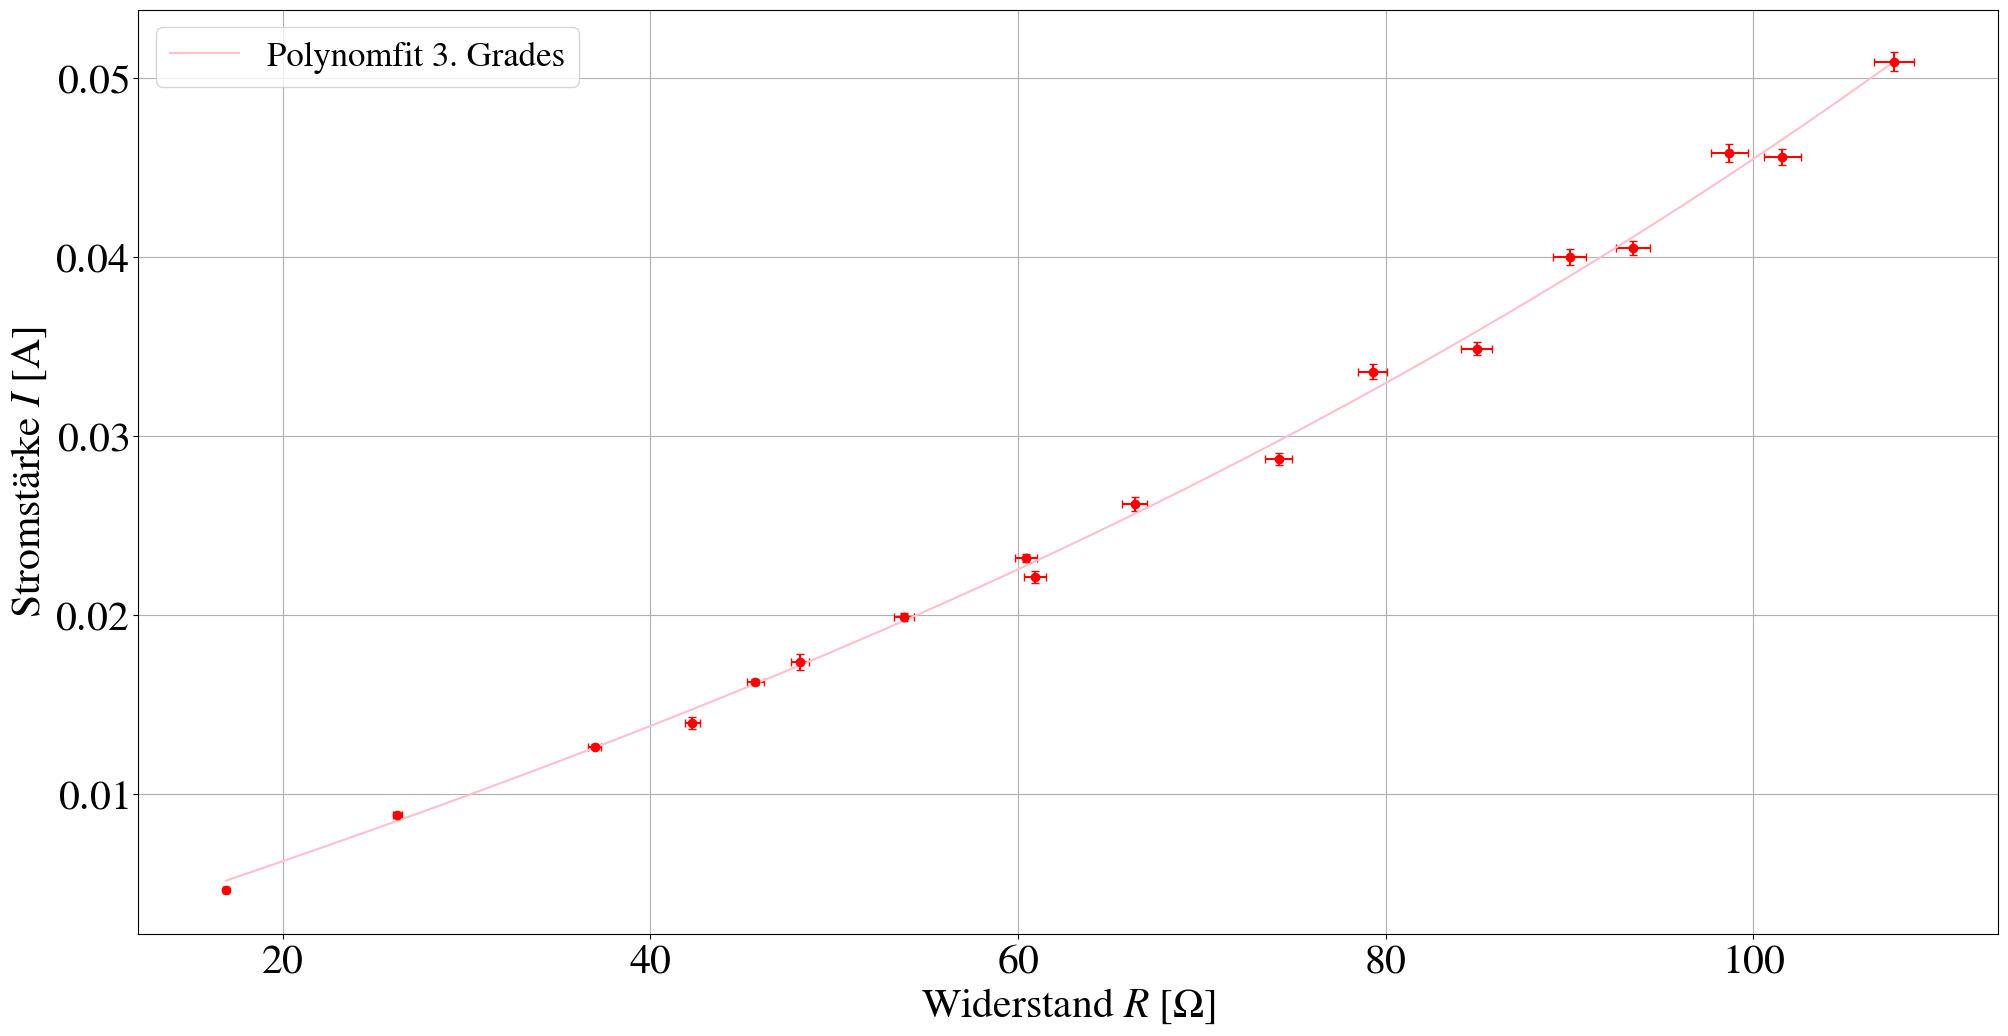

In [68]:
#plt.scatter(res10, i10, marker="o", color="red")
#plt.scatter( res30,i30, marker="o", color="red")
#plt.scatter( res200,i200, marker="o", color="red")
plt.xlabel(r"Widerstand $R\ \mathrm{[Ω]}$")
plt.ylabel(r"Stromstärke $I\ \mathrm{[A]}$")
plt.errorbar(
    res10, i10,
    xerr=res10_err, yerr=i10_err,
    fmt='ro', capsize=3
)
plt.errorbar(
    res30, i30,
    xerr=res30_err, yerr=i30_err,
    fmt='ro', capsize=3
)
plt.errorbar(
    res200, i200,
    xerr=res200_err, yerr=i200_err,
    fmt='ro', capsize=3
)
plt.plot(i_fit.x_fit, i_fit.y_fit, color="pink", label="Polynomfit 3. Grades")
#plt.axis([-0.01, 0.55, 50, 75])
#plt.xticks(np.arange(0, 0.52, 0.05))  # X-Achse mit Schrittweite 0.05
#plt.yticks(np.arange(50, 75 + 2.5, 2.5))

#plt.title(label="Extrapolation der Regressionsgerade")

plt.legend(prop={'size': 25})
plt.grid()
plt.savefig('figures/ir-diagram.pdf')
plt.show()